# TP1-Image Transformations and Morphological Operations
**ATRIM - Option DATASIM - Ecole Centrale Nantes**

**Diana Mateus**

**Participants: JAMOUD Yassine - HAFFOUDHI Samy**



### Objectives 

The goal of this lab session is to understand in practice:
- How to quantitatively characterize an images, e.g. by measuring their properties
- Compute the 
- Use morphological operations in practice 
put in practice some of the concepts studied during the first lecture  implement several of the transformations seen during 

### Instructions
- The most important in your repport are the comments that explain observations and steps.
- Upload to hippocampus BOTH your report AND code (.ipynb). If you choose to create the report directly on a python notebook, you can submit as report the (.html) version of the notebook (in addition tothe .ipynb).
- Deadline is 24th of September 2021 (23:55)

## 0. Preparation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random


__Read and display the images in the provided folders__

Download and unzip the images folder.  If everything goes well, the following code will loop over the images and show them on the screen. 

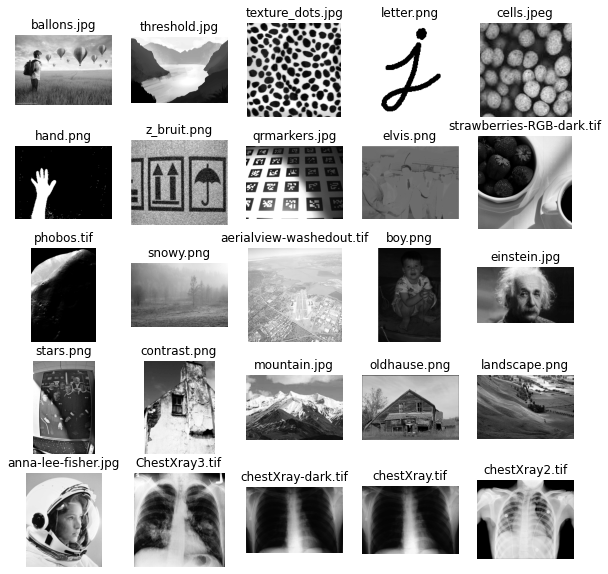

In [2]:
IMDIR = "./images/" 
           
#The following lines control how big the images are shown on the screen
width=10 
height=10
plt.rcParams['figure.figsize'] = [width, height]

#we create a figure
fig=plt.figure()

#and look for all available image files in IMDIR
im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # uncomment the next line to print the file paths if no image is being shwon
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            
            if im_counter > 25: #showing maximum 25 images
                break
                
            # display it
            plt.subplot(5,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 
            

plt.show()

# 1. Global Measures

### 1.1. Image histograms and global measures

**a)** Create a function that measures the luminance and contrast of an image.

**b)** Create a function to compute and visualize the histogram AND the cummulative histogram of an image, 

*Hint:* You can use ``np.histogram`` or implement your own. In the first case, to plot with ``plt.plot`` you need to compute the bin centers from the bin limits.


**c)** Try the provided shuffle function, which recieves a grayscale image, shuffles its pixels and returns the shuffled image.

*Hint:*
```python
np.random.shuffle(im.ravel())
```
**d)** 
Loop over the images in the ``chestXRay`` folder and apply the shuffle funciton. For each image (before AND after shuffling)
- print the size of the image
- print its min, max values 
- print the computed luminance and contrast.
- plot the image before and after the shuffling
- plot the histogram and cummulative histogram before and after the shuffling
*Hint"* use 
``plt.subplot`` to plot several plots in a single figure


### ===========
### Response
**a)** Let's create luminance and contrast functions by using the course formula:

In [3]:
#luminance function
def luminance(im):
    h, w = im.shape
    l = 0
    for i in range(h):
        for j in range(w):
            l += im[i, j]
    l /= (h * w)
    return l

#contrast function
def contrast(im):
    h, w = im.shape
    c = 0
    l = luminance(im)
    for i in range(h):
        for j in range(w):
            c += (im[i, j] - l) ** 2
    c = np.sqrt(c / (h * w))
    return c


We can test both function with the image *ballons* for example :

In [4]:
im_path = "images/ballons.jpg" 
im = io.imread(im_path,as_gray=True)

print(f'Contrast: {contrast(im)}')
print(f'Luminance: {luminance(im)}')

Contrast: 0.23704251320667521
Luminance: 0.5703899662832406


**b)** For the histogram we used numpy histogram function : 

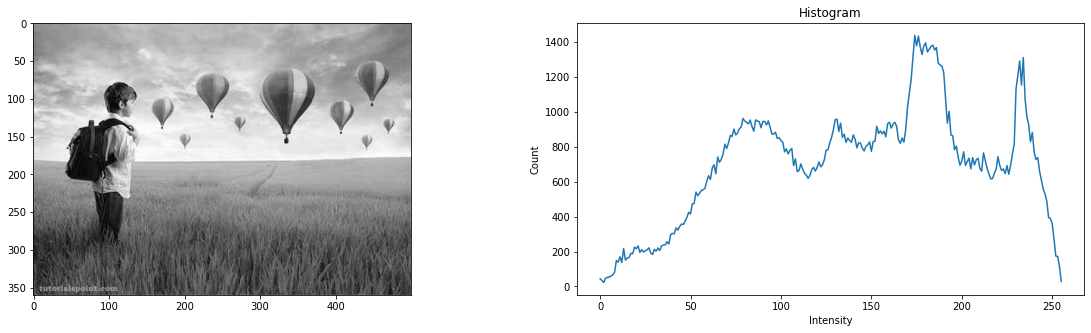

In [6]:
width=20
height=5
plt.rcParams['figure.figsize'] = [width, height]

def histogram(im):
    hist, _ = np.histogram(im, bins=256)
    plt.title('Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.plot(hist)
    return hist
   
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
histogram(im);

And for the cumulative histogram we used again numpy histogram function and then we added for each value the previous value

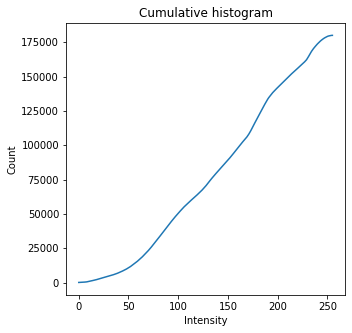

In [10]:
width = 5
height = 5
plt.rcParams['figure.figsize'] = [width, height]

def cumulative_histogram(im):
    hist, _ = np.histogram(im, bins=256)
    for i in range(1, hist.size):
        hist[i] += hist[i - 1]
    
    plt.plot(hist)
    plt.title("Cumulative histogram")
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    return hist
            
cumulative_histogram(im);

**c)** here we used the shuffle_image function and plot the result :

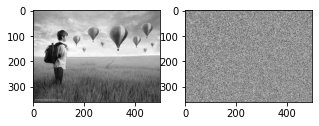

In [11]:
#4students
import skimage.metrics as metrics

#Receives only grayscale images
def shuffle_image(im_gray):
    im_shuffle = im_gray.ravel().copy()
    np.random.shuffle(im_shuffle)
    im_shuffle=np.reshape(im_shuffle, im_gray.shape)
    return im_shuffle

plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(shuffle_image(im), cmap='gray')

plt.show()

**d)** Here we looped on each image and we computed the shuffled image then print all infos and histogram:

Image ChestXray3.tif
Normal : size: (1790, 1726) min: 23 max: 254 luminance: 142.41142532545297 contrast: 68.66681769718791
Shuffled : size: (1790, 1726) min: 23 max: 254 luminance: 142.41142532545297 contrast: 68.66681769723388
Image chestXray-dark.tif
Normal : size: (418, 602) min: 3 max: 227 luminance: 60.08313198429477 contrast: 56.46940064394441
Shuffled : size: (418, 602) min: 3 max: 227 luminance: 60.08313198429477 contrast: 56.46940064394489
Image chestXray.tif
Normal : size: (503, 720) min: 3 max: 222 luminance: 59.861036558427216 contrast: 56.26042159519735
Shuffled : size: (503, 720) min: 3 max: 222 luminance: 59.861036558427216 contrast: 56.260421595191104
Image chestXray2.tif
Normal : size: (493, 600) min: 0 max: 253 luminance: 141.8667410412441 contrast: 84.49625132602684
Shuffled : size: (493, 600) min: 0 max: 253 luminance: 141.8667410412441 contrast: 84.49625132602647


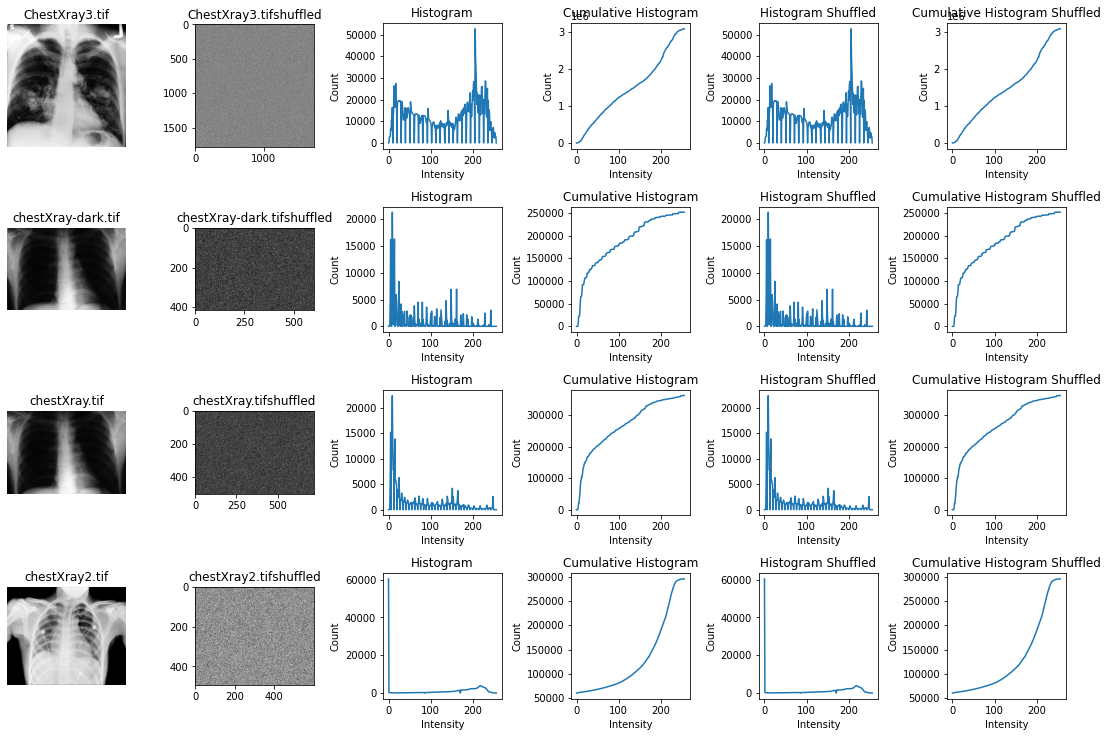

In [12]:
IMDIR = "./images/chestXray" 
           
width=15
height=15
plt.rcParams['figure.figsize'] = [width, height]

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename) 

        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):    
            im = io.imread(f,as_gray=True)
            im_shuffled = shuffle_image(im)
            print(f"Image {filename}")
            print(f"Normal : size: {im.shape} min: {im.min()} max: {im.max()} luminance: {luminance(im)} contrast: {contrast(im)}")
            print(f"Shuffled : size: {im_shuffled.shape} min: {im_shuffled.min()} max: {im_shuffled.max()} luminance: {luminance(im_shuffled)} contrast: {contrast(im_shuffled)}")
            plt.subplot(6,6,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            plt.subplot(6, 6, im_counter+1)
            plt.imshow(im_shuffled, cmap='gray')
            plt.title(filename + 'shuffled')
            plt.subplot(6, 6, im_counter+2)
            histogram(im) 
            plt.title('Histogram')
            plt.subplot(6, 6, im_counter+3)
            cumulative_histogram(im)    
            plt.title('Cumulative Histogram')
            plt.subplot(6, 6, im_counter+4)
            histogram(im_shuffled) 
            plt.title('Histogram Shuffled')
            plt.subplot(6, 6, im_counter+5)
            cumulative_histogram(im_shuffled)
            plt.title('Cumulative Histogram Shuffled')
            print("====================================")
            im_counter+=6
plt.tight_layout()       
plt.show()

### 1.2 PSNR
**a)** Create a function that computes the Peak SNR (PSNR) of an image following the formulae.
*Hint*: The Mean Square Error (MSE) and the Peak Signal to Noise Ratio (PSNR)  are the two error metrics used to compare image quality when a reference image is available. The MSE represents the cumulative squared error between the compressed and the original image, whereas PSNR represents a measure of the peak error. The lower the value of MSE, the lower the error. The higher the https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio

**b)** Using the global measures (min, max, luminance, contrast, histogram, cumulative histogram) above, AND the PSNR. what can you say about the image quality of the images in the ``sombrero`` and ``dental`` folders? Use the best image as reference for the PSNR calculation


In [13]:
def mse(im, im_noisy):
    h, w = im.shape
    MSE = 0
    for i in range(h):
        for j in range(w):
            MSE += (im[i, j] - im_noisy[i, j]) ** 2
    MSE /= (h * w)
    return MSE

def PSNR(im, im_noisy):
    MSE = mse(im, im_noisy)
    MAX = 255
    PSNR = 20 * np.log(MAX) - 10 * np.log(MSE)
    return PSNR

Sombrero PSNR: 25.423877040816606
Sombrero Contrast: 51.55958194049322
Sombreo Luminance: 56.43033127584845
Sombrero Noisy Contrast: 26.19016569315033
Sombreo Noisy Luminance: 115.30520542520199

Dental salt PSNR: 29.847389200205484
Dental pepper PSNR: 30.419895349326538
Dental Contrast: 52.544263682862
Dental Luminance: 166.81815673846197
Dental Salt Contrast: 39.646191395899784
Sombreo Salt Luminance: 115.46706971611592
Dental Pepper Contrast: 70.52379495667466
Sombreo Pepper Luminance: 150.11242547694755


[]

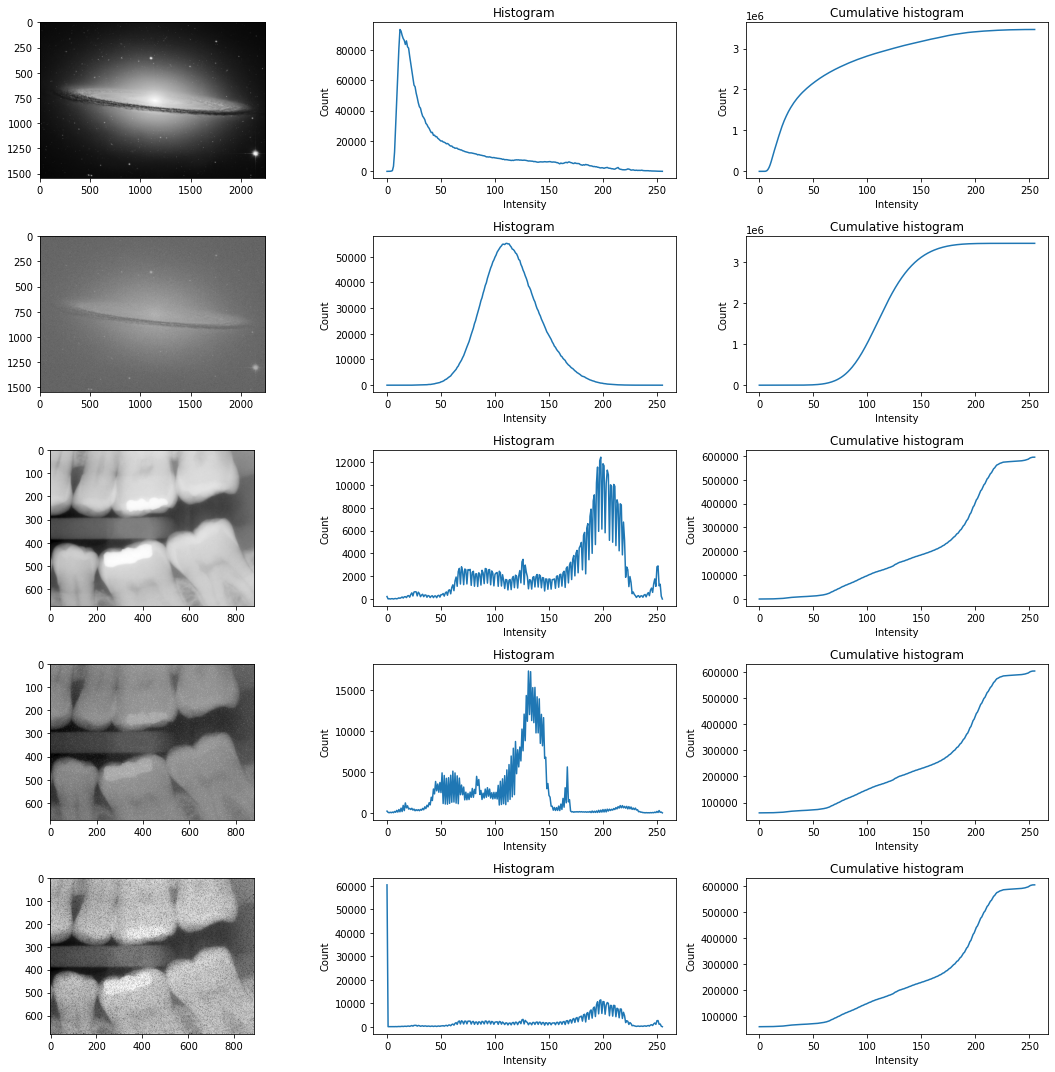

In [18]:
width=15
height=15
plt.rcParams['figure.figsize'] = [width, height]

imf = "./images/sombrero/sombrero-galaxy-original.tif" 
noisyf = "./images/sombrero/sombrero-galaxy-noisy.tif"

im = io.imread(imf,as_gray=True)
im_noisy = io.imread(noisyf,as_gray=True)
im = im.astype('float')
im_noisy = im_noisy.astype('float')

print(f'Sombrero PSNR: {PSNR(im, im_noisy)}')

# Autres données permettant de comparer les images
print(f'Sombrero Contrast: {contrast(im)}' )
print(f'Sombreo Luminance: {luminance(im)}')
print(f'Sombrero Noisy Contrast: {contrast(im_noisy)}' )
print(f'Sombreo Noisy Luminance: {luminance(im_noisy)}\n')
# Affichage des histogrammes
plt.subplot(5, 3, 1)
plt.imshow(im, cmap='gray')
plt.subplot(5, 3, 2)
histogram(im)
plt.subplot(5, 3, 3)
cumulative_histogram(im)
plt.subplot(5, 3, 4)
plt.imshow(im_noisy, cmap='gray')
plt.subplot(5, 3, 5)
histogram(im_noisy)
plt.subplot(5, 3, 6)
cumulative_histogram(im_noisy)

imf = './images/dental/dentalXray.tif'
noisyf1 = './images/dental/dentalXray-salt-noise.tif'
noisyf2 = './images/dental/dentalXray-pepper-noise.tif'

im = io.imread(imf,as_gray=True)
im_noisy1 = io.imread(noisyf1,as_gray=True)
im = im.astype('float')
im_noisy1 = im_noisy1.astype('float')
im_noisy2 = io.imread(noisyf2,as_gray=True)
im_noisy2 = im_noisy2.astype('float')

# on utilise l'image sans bruit comme réference pour les calculs
print(f'Dental salt PSNR: {PSNR(im, im_noisy1)}')
print(f'Dental pepper PSNR: {PSNR(im, im_noisy2)}')

# Autres données permettant de comparer les images
print(f'Dental Contrast: {contrast(im)}' )
print(f'Dental Luminance: {luminance(im)}')
print(f'Dental Salt Contrast: {contrast(im_noisy1)}' )
print(f'Sombreo Salt Luminance: {luminance(im_noisy1)}')
print(f'Dental Pepper Contrast: {contrast(im_noisy2)}' )
print(f'Sombreo Pepper Luminance: {luminance(im_noisy2)}')
# Affichage des histogrammes
plt.subplot(5, 3, 7)
plt.imshow(im, cmap='gray')
plt.subplot(5, 3, 8)
histogram(im)
plt.subplot(5, 3, 9)
cumulative_histogram(im)
plt.subplot(5, 3, 10)
plt.imshow(im_noisy1, cmap='gray')
plt.subplot(5, 3, 11)
histogram(im_noisy1)
plt.subplot(5, 3, 12)
cumulative_histogram(im_noisy2)
plt.subplot(5, 3, 13)
plt.imshow(im_noisy2, cmap='gray')
plt.subplot(5, 3, 14)
histogram(im_noisy2)
plt.subplot(5, 3, 15)
cumulative_histogram(im_noisy2)

plt.tight_layout()       
plt.plot()

D'après les différents résultats obtenus, on remarque par exemple que :

* Le PSNR pour le cas du pepper noise est légerement plus faible que pour le salt noise
* Le contraste pour le cas du pepper noise est supérieur à celui du salt noise
* De même pour la luminance
* Pour l'image Galaxy, la version avec du bruit perd beacoup en contraste tout en gagnant en luminance

# 2. Intensity transformations and Histograms

### 2.1 Color to grayscale and grayscale to black and white 
**(a)** Create a function that receives as input a color image and transforms it to grayscale. Read the image **outside** the function. Apply the function to the ```ballons.jpg``` image.

**(b)** Create a function that reads a grayscale image and given a parameter ```k``` implements a threshold function and provides. Apply and show the result on the ```threshold.jpg``` image. Show the results for various k. **Hint**: you may want to use the ```np.where``` function

**Advanced**: you may want to use the ```interact``` from 
```
from ipywidgets import interact
import ipywidgets as widgets
```
to create a sliding bar for the threshold parameter or the color saturation

In [14]:
def toGray(im):
    im = im.astype('float')
    R = im[:,:,0]
    G = im[:,:,1]
    B = im[:,:,2]
    im = 0.3 * R + 0.59 * G + 0.11 * B
    return im

def threshold(im, k):
    return np.where(im < k, 0, 1)

**a)** Lets apply the toGray on ballons.jpg

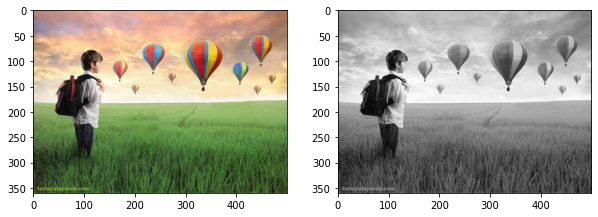

In [30]:
im = io.imread('images/ballons.jpg')
imGray = toGray(im)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(imGray, cmap='gray')
plt.show()

**b)** Lets apply threshold for various values of `k`

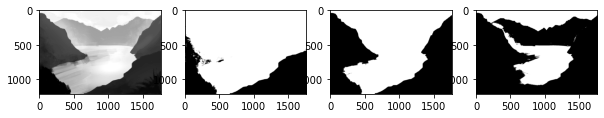

In [35]:
im = io.imread('images/threshold.jpg',as_gray=True)
plt.subplot(1,4,1)
plt.imshow(im,cmap='gray')

imTresh=threshold(im,0.2)
plt.subplot(1,4,2)
plt.imshow(imTresh, cmap='gray')

imTresh=threshold(im,0.5)
plt.subplot(1,4,3)
plt.imshow(imTresh, cmap='gray')

imTresh=threshold(im,0.8)
plt.subplot(1,4,4)
plt.imshow(imTresh, cmap='gray')

plt.show()

### 2.3 Graylevel transformations and transfer functions

Implement the following graylevel transformations as independent functions. Then apply the functions to the images in the 
```
histograms
``` 
folder.

**a)** Implement a generic linear transformation parameterized by a and b such that its transfer function has the form ```f(x) = a x + b``` 

**b)** Implement a function that inverts the image intensities

**c)** Implement one of the nonlinear parametric transfer functions (normalization with saturation, contrast stretching, gamma, ...)

**(d)** Plot the transfer functions for all transformations in (a) to (d)

**(e)** Loop over the images in the folder and display the results for each image:
- The original and the transformed images.
- The transfer function
- The corresponding histogram. 

**Hints** 
- set the horizontal limits fo the histograms to a fix size e.g. ```set_lim([0 255])```
- Make sure that the histograms associated to a single figure have comparable vertical axis limits. 


IMDIR = "./images/histograms"



In [36]:
def linear_transformation(x, a, b):
    return a * x + b

def reverse(x):
    return 1 - x

def gamma(x, c, g):
    return c * (x ** g)

**d)** Let's plot the transfer Function :

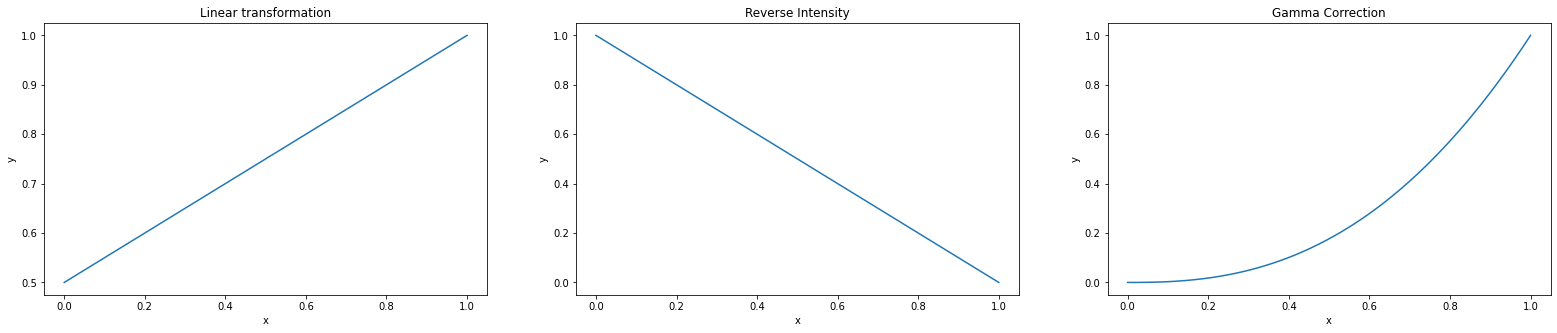

In [43]:
width=27
height=5

plt.rcParams['figure.figsize'] = [width, height]
plt.ylim([0, 1])
x = np.linspace(0, 1, 100)

y = linear_transformation(x, 0.5, 0.5)
plt.subplot(1, 3, 1)
plt.title('Linear transformation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)

y = reverse(x)
plt.subplot(1, 3, 2)
plt.title('Reverse Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)

y = gamma(x, 1, 2.5)
plt.subplot(1, 3, 3)
plt.title('Gamma Correction')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)

plt.show()

**e)** Here we looped throught all images with the transfer function invert

8


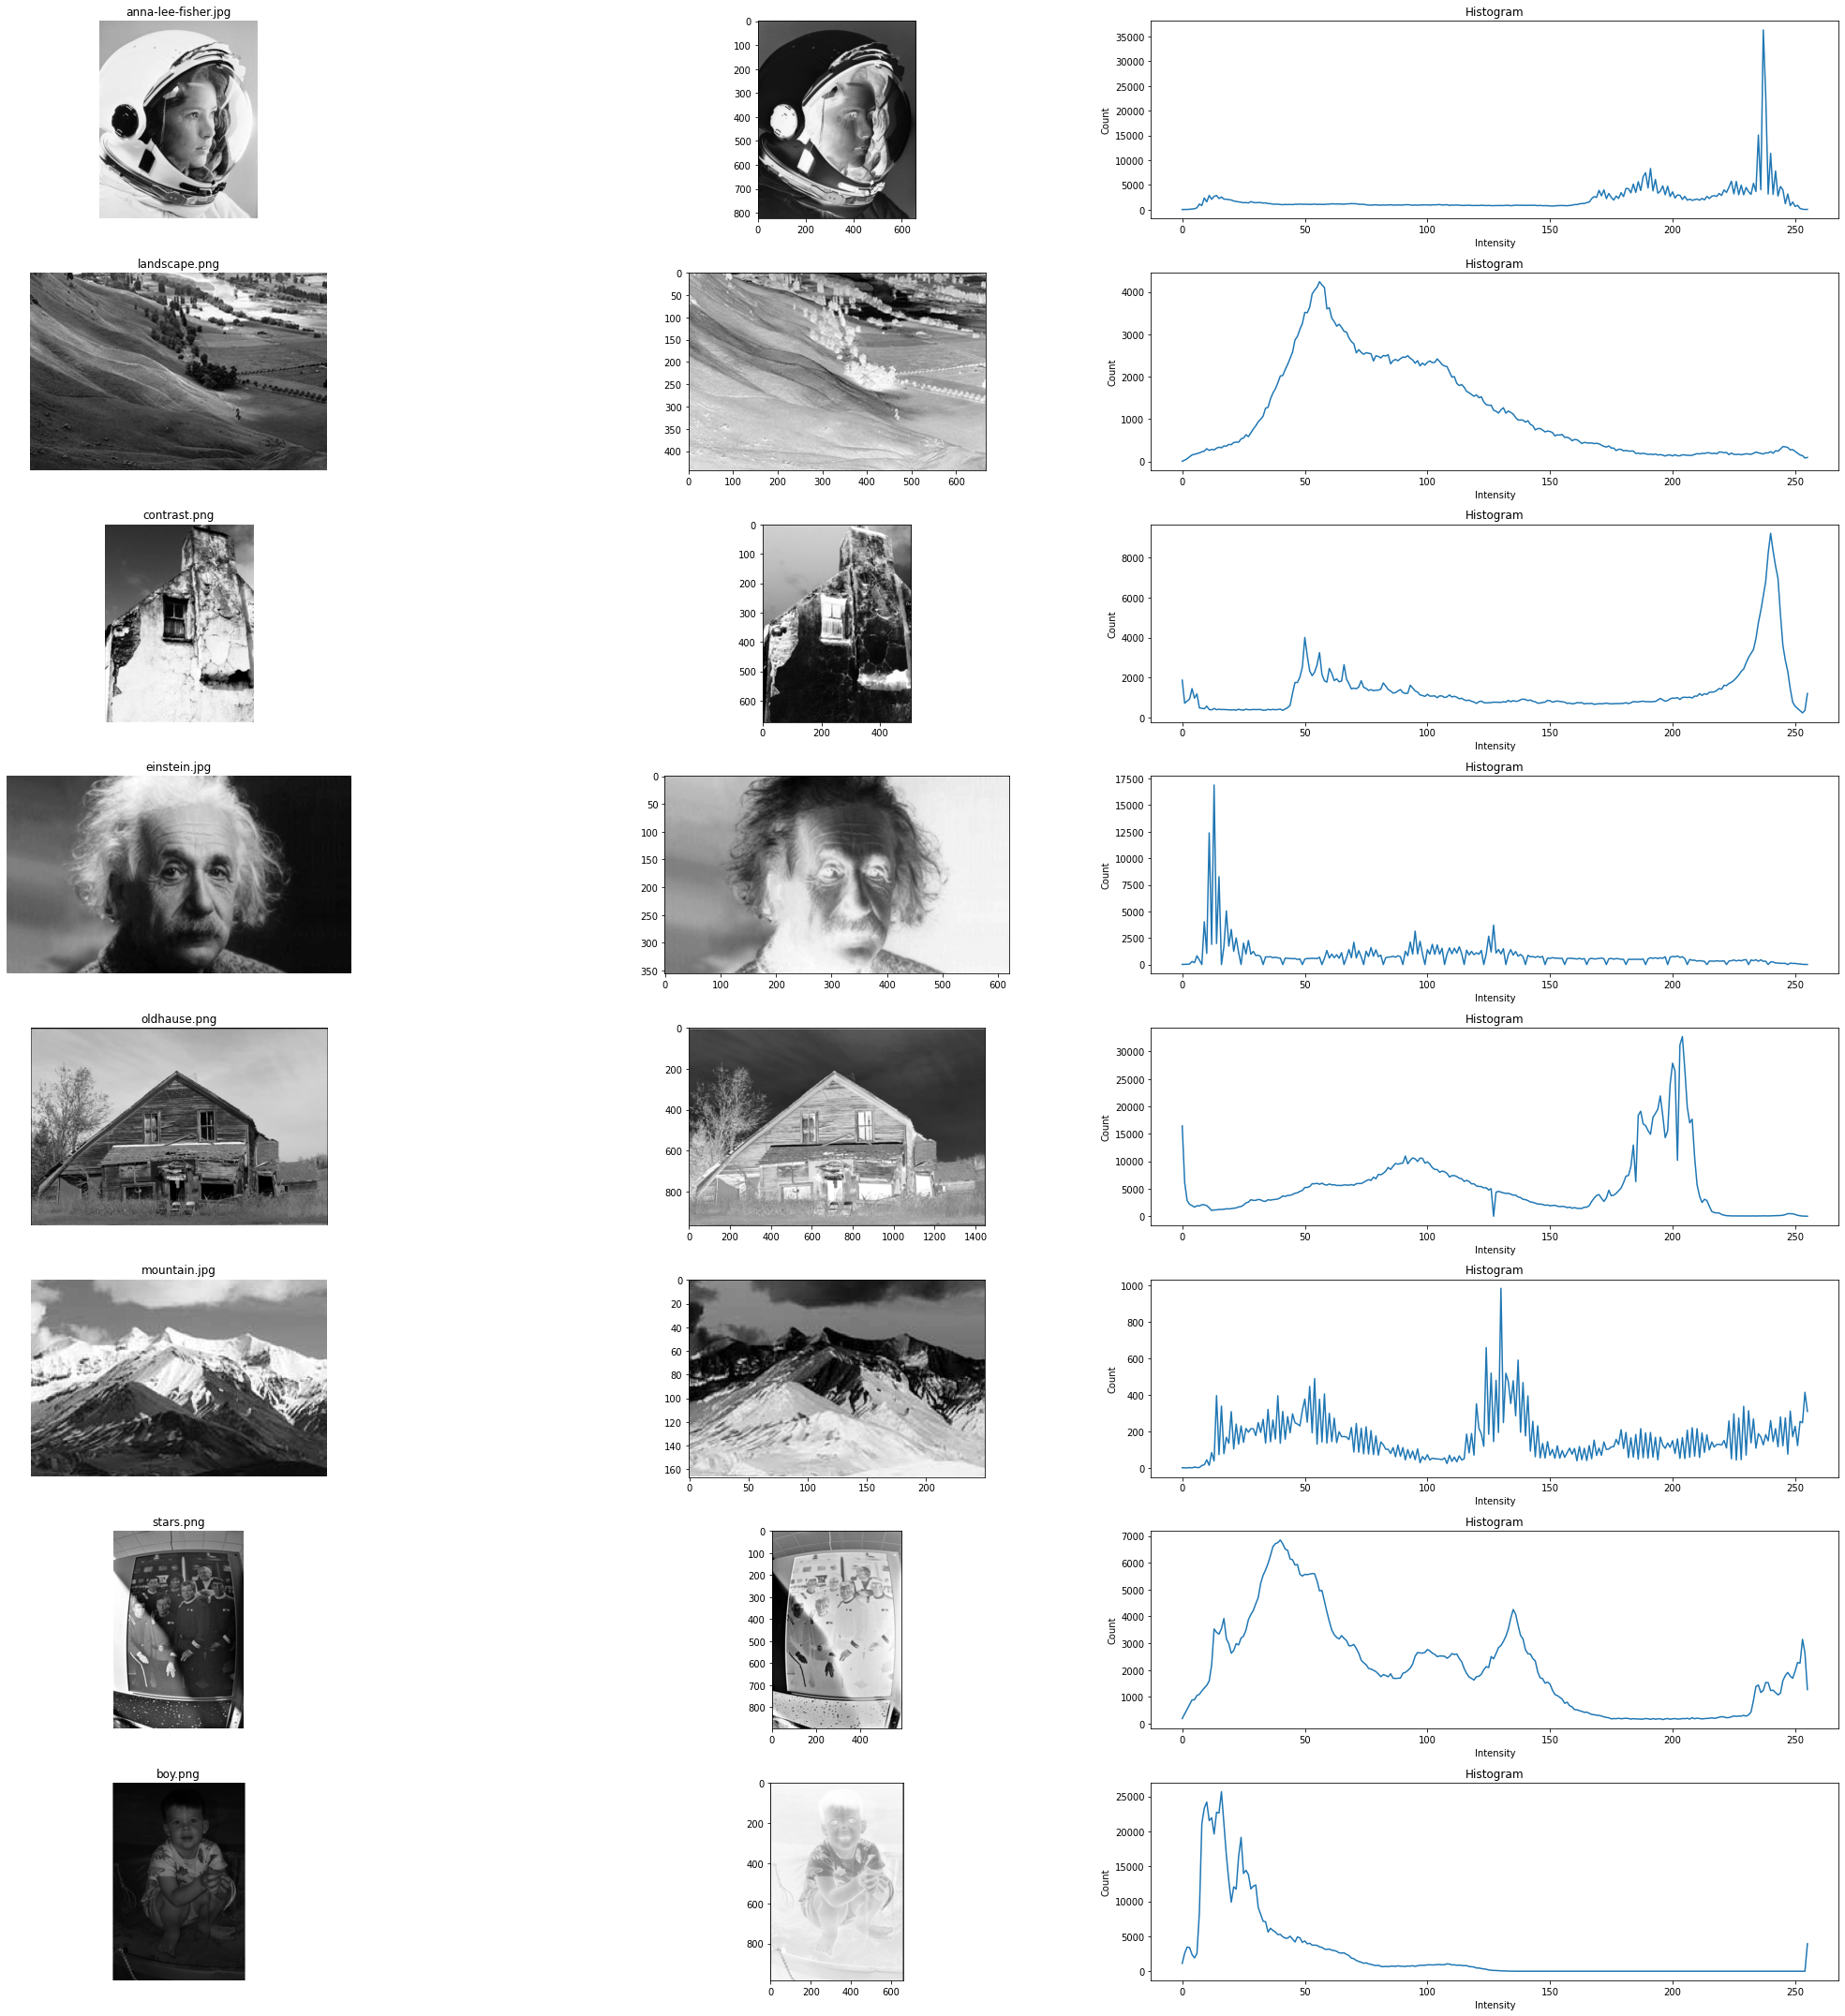

In [59]:
IMDIR = "./images/histograms" 
           
width=30
height=30
plt.rcParams['figure.figsize'] = [width, height]

nbr_images=len(io.ImageCollection(IMDIR+'/*'))
im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename) 

        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):    
            im = io.imread(f)
            if len(im.shape) > 2:
                im = toGray(im)
                
            plt.subplot(nbr_images,3,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            
            plt.subplot(nbr_images,3,im_counter+1)
            plt.imshow(reverse(im), cmap='gray')
            
            plt.subplot(nbr_images,3,im_counter+2)
            histogram(im)

            im_counter += 3
            
plt.tight_layout()       
plt.show()

### 2.4 Histogram equalization

Implement the histogram equalization algorithm and apply it to the images in the ``equalization`` folder. Display the original and the equalized image, the original and the equalized histograms, as well as the original and equalized **cumulative** histograms. 

**Write down a comment about your findings** Explain the resulting images, as well as the shape of the histograms and cumulative histograms before and after the transformation. Why does it make sense to use the cumulative histogram as a transformation?


In [60]:
def equalize(im):
    h, _ = np.histogram(im, bins=256)
    M, N = im.shape
    h = h / (M * N)
    
    for i in range(1,len(h)):
        h[i] += h[i-1]
        
    for i in range(M):
        for j in range(N):
            im[i,j] = 255 * h[int(im[i,j])]
            
    return im

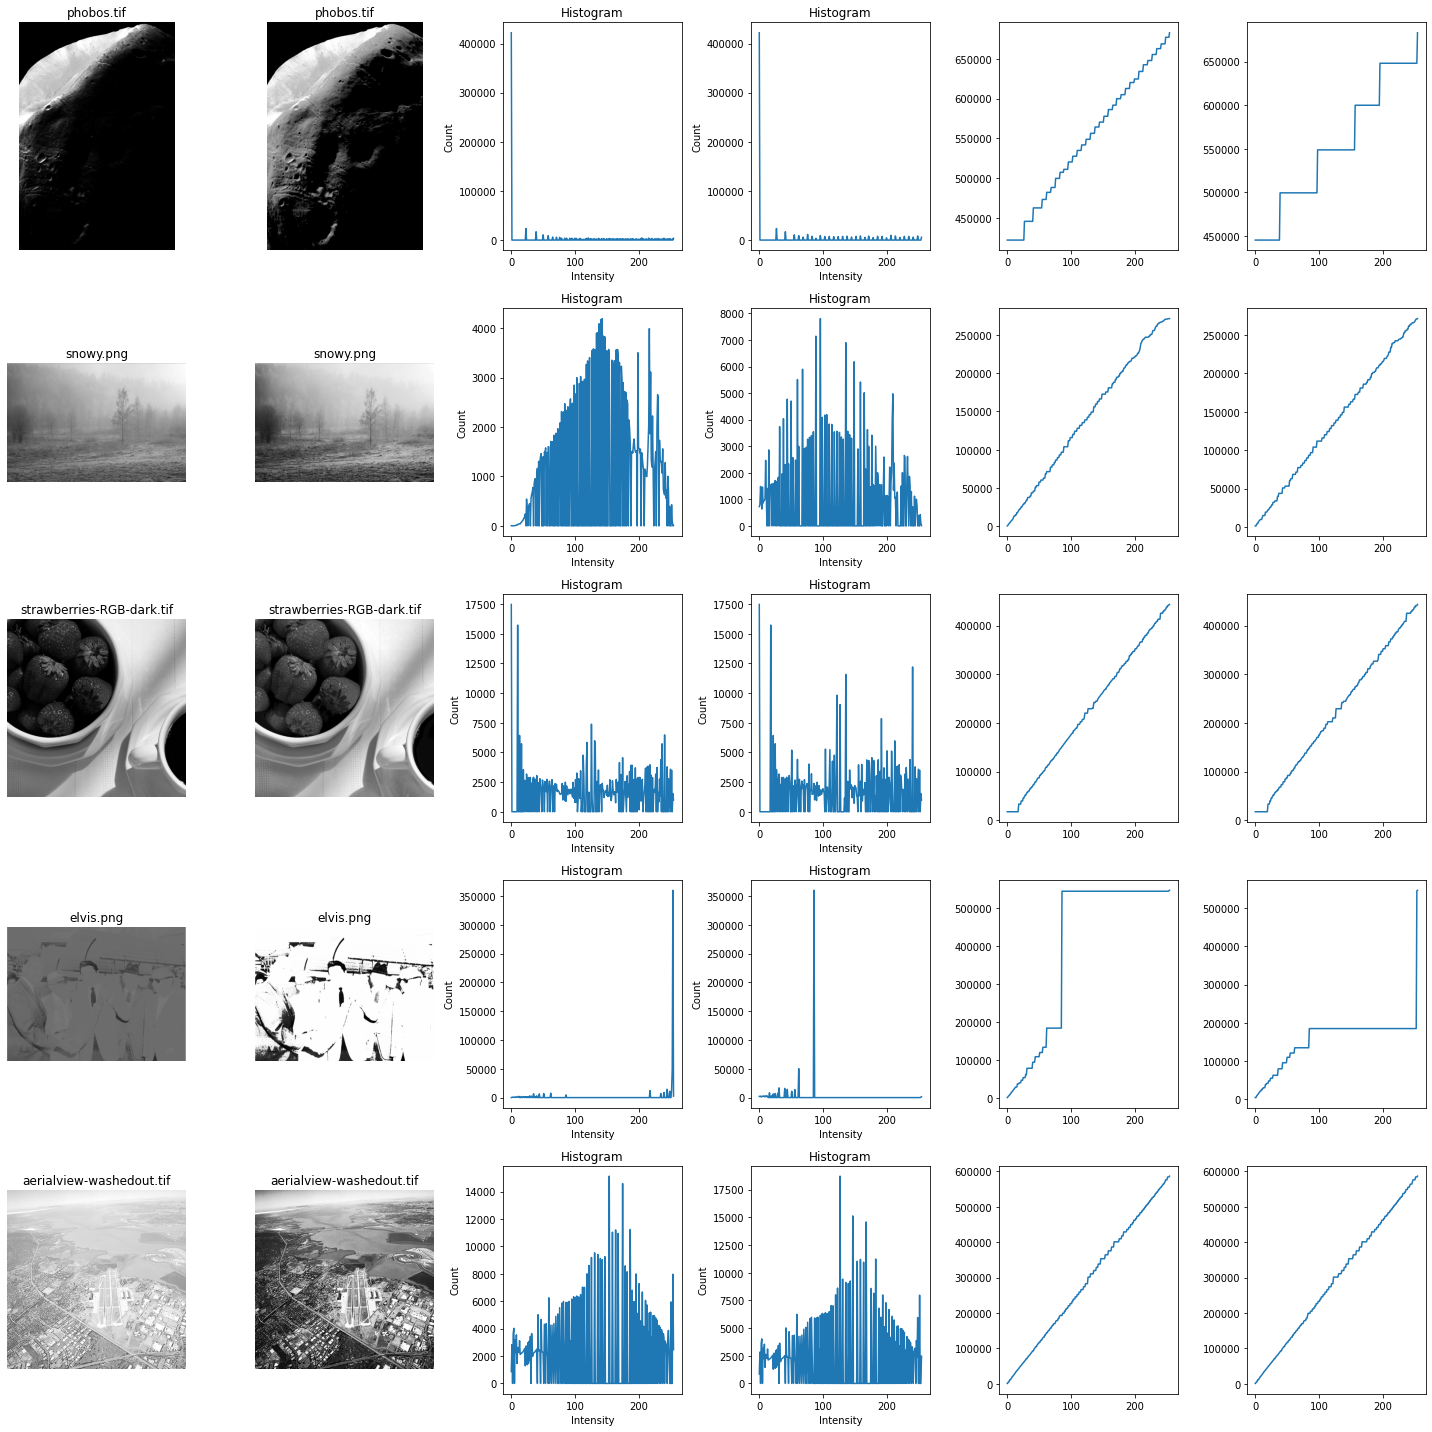

In [70]:
IMDIR = "./images/equalize"

width=20
height=20
plt.rcParams['figure.figsize'] = [width, height]
nbr_images=len(io.ImageCollection(IMDIR+'/*'))

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename) 

        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):    
            im = io.imread(f)
            if len(im.shape) > 2:
                im = toGray(im)
                
            # affichage image originale
            plt.subplot(nbr_images,6,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            
            # affichage image transformée
            plt.subplot(nbr_images,6,im_counter+1)
            plt.imshow(equalize(im), cmap='gray')
            plt.title(filename)
            plt.axis('off')
            
            # affichage histogramme 
            plt.subplot(nbr_images,6,im_counter+2)
            histogram(im)

            # affichage histogramme transformé
            plt.subplot(nbr_images,6,im_counter+3)
            histogram(equalize(im))
            
            # affichage histogramme cummulé
            plt.subplot(nbr_images,6,im_counter+4)
            cumulative_histogram(im)
                      
            # affichage histogramme cummulé transformé
            plt.subplot(nbr_images,6,im_counter+5)
            cumulative_histogram(equalize(im))
                                 
            im_counter+=6
            
plt.tight_layout()       
plt.show()

## 3.0 Morphological operations


Loop over the images in the ```morphology``` folder. Apply the following morphological operations to the images by first converting them to grayscale: 

**a)** erosion

**b)** dilation

**c)** closure

**d)** opening

**e)** border extraction

**f)** Apply the filters to the original gray scale images. 
- Explain the results for the binary as well as for the grayscale images. 
- What is the effect of the structuring element shape?

Hints: use the scikit help for morphological operations.  For instance to declare an structuring element use
```python
# declare an structuring elment
selem = disk(6)
# apply a scipy morphological operation
eroded_im = erosion(im, selem)
```


**BONUS** implement your own erosion and dilation functions.

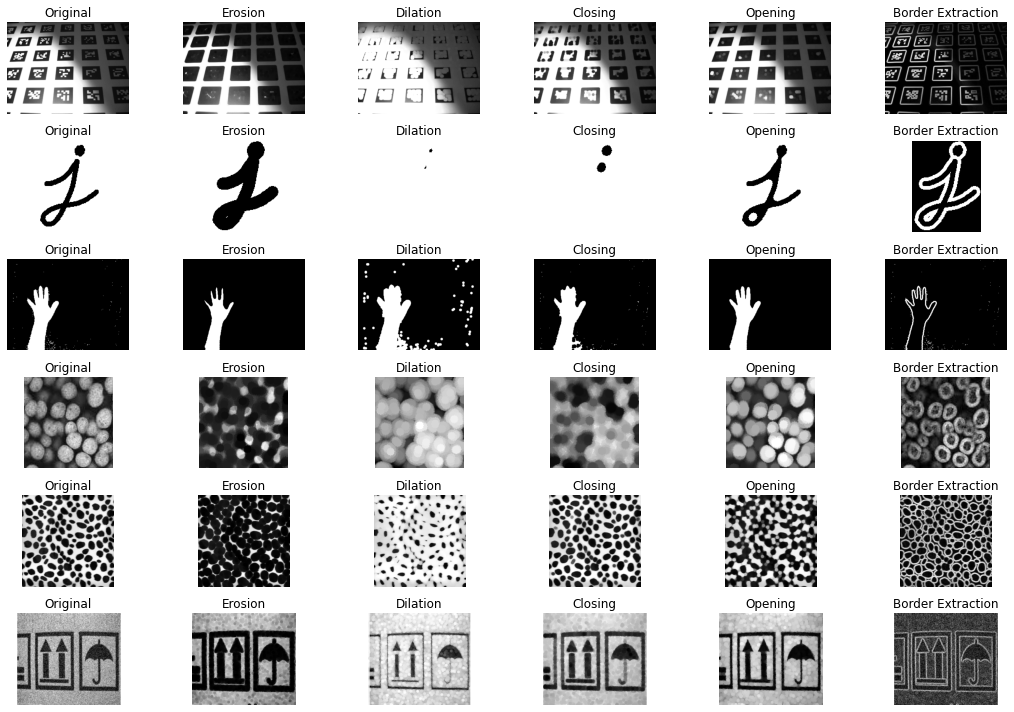

In [73]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
IMDIR = "./images/morphology"

width=15
height=10
plt.rcParams['figure.figsize'] = [width, height]

selem = disk(6)
im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename) 

        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):    
            im = io.imread(f)
            if len(im.shape) > 2:
                im = toGray(im)
                
            plt.subplot(6,6,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title('Original')
            plt.axis('off')
            
            plt.subplot(6, 6, im_counter+1)
            plt.imshow(erosion(im, selem), cmap='gray')
            plt.title('Erosion')
            plt.axis('off')
            
            plt.subplot(6, 6, im_counter+2)
            plt.imshow(dilation(im, selem), cmap='gray')
            plt.title('Dilation')
            plt.axis('off')
            
            plt.subplot(6, 6, im_counter+3)
            plt.imshow(closing(im, selem), cmap='gray')
            plt.title('Closing')
            plt.axis('off')

            plt.subplot(6, 6, im_counter+4)
            plt.imshow(opening(im, selem), cmap='gray')
            plt.title('Opening')
            plt.axis('off')
            
            plt.subplot(6, 6, im_counter+5)
            plt.imshow(im - erosion(im, selem), cmap='gray')
            plt.title('Border Extraction')
            plt.axis('off')
            
            im_counter += 6
            
plt.tight_layout()       
plt.show()

**f)** l'element structurant permet de gerer notre filtre comme on le souhaite. On peut créer un element structurant adapté a notre application.